In [2]:
import numpy as np 

kINSP = np.array([(1, 8, +1),
               (7, 2, -1),
               (6, -1, -1),
               (-5, 0, +1),
               (-5, 1, -1),
               (-5, 2, +1),
               (6, 3, +1),
               (6, 1, -1),
               (5, 2, -1)])

kSEP = np.array([(-2, 2, +1),    # 0 - A
              (0, 4, +1),     # 1 - B
              (2, 1, +1),     # 2 - C
              (-2, -3, -1),   # 3 - D
              (0, -1, -1),    # 4 - E
              (2, -3, -1),    # 5 - F
              ])


def weight_vector(x, y, alpha):
    """
    Given a vector of alphas, compute the primal weight vector w. 
    The vector w should be returned as an Numpy array. 
    """

    w = np.zeros(len(x[0]))
    w = sum(alpha[i]*y[i]*x[i] for i in range(len(y)))
    # TODO: IMPLEMENT THIS FUNCTION
    
    return w



def find_support(x, y, w, b, tolerance=0.001):
    """
    Given a set of training examples and primal weights, return the indices 
    of all of the support vectors as a set. 
    """

    support = set()
    # TODO: IMPLEMENT THIS FUNCTION
    support.update([i for i in range(len(y)) if (y[i]*(w.dot(x[i]) + b) == 1)])
    return support



def find_slack(x, y, w, b):
    """
    Given a set of training examples and primal weights, return the indices 
    of all examples with nonzero slack as a set.  
    """

    slack = set()
    # TODO: IMPLEMENT THIS FUNCTION
    slack.update([i for i in range(len(y)) if (y[i]*(w.dot(x[i]) + b) < 1)])
    return slack




In [5]:
class Numbers:
    """
    Class to store MNIST data
    """

    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if
        # you'd like.

        import cPickle, gzip

        # Load the dataset
        f = gzip.open(location, 'rb')
        train_set, valid_set, test_set = cPickle.load(f)

        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

In [15]:
class ThreesAndEights:
    """
    Class to store MNIST data
    """

    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if
        # you'd like.

        import cPickle, gzip

        # Load the dataset
        f = gzip.open(location, 'rb')

        train_set, valid_set, test_set = cPickle.load(f)

        self.x_train = train_set[0][np.where(np.logical_or( train_set[1]==3, train_set[1] == 8))[0],:]
        self.y_train = train_set[1][np.where(np.logical_or( train_set[1]==3, train_set[1] == 8))[0]]

        shuff = np.arange(self.x_train.shape[0])
        np.random.shuffle(shuff)
        self.x_train = self.x_train[shuff,:]
        self.y_train = self.y_train[shuff]

        self.x_valid = valid_set[0][np.where(np.logical_or( valid_set[1]==3, valid_set[1] == 8))[0],:]
        self.y_valid = valid_set[1][np.where(np.logical_or( valid_set[1]==3, valid_set[1] == 8))[0]]

        self.x_test  = test_set[0][np.where(np.logical_or( test_set[1]==3, test_set[1] == 8))[0],:]
        self.y_test  = test_set[1][np.where(np.logical_or( test_set[1]==3, test_set[1] == 8))[0]]
        
        f.close()

In [22]:
def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1,28))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname: 
        plt.savefig(outname)
    else:
        plt.show()

In [45]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

data = ThreesAndEights("../data/mnist.pkl.gz")


In [43]:
scale = .20
train_len = int(.2*len(data.x_train))
test_len = int(.2*len(data.x_test))
x_train = data.x_train[:int(train_len*.8)]
y_train = data.y_train[:int(train_len*.8)]
holdout_x = data.x_train[int(train_len*.8):]
holdout_y = data.y_train[int(train_len*.8):]

x_test = data.x_test[:test_len]
y_test = data.y_test[:test_len]

In [29]:

lin_clf = svm.SVC(kernel = "linear", degree = 1)
lin_clf.fit(train_x,train_y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
params_grid = [
    {'C': [1,5,10,20,50,100], 'kernel': ['linear'], 'degree':[1]},
    {'C': [1,5,10,20,50,100], 'kernel': ['poly'], 'degree':[2,3,4,5]},
    {'C': [1,5,10,20,50,100], 'kernel': ['rbf'], 'gamma': [.0001,.000001]}
]

# clf = GridSearchCV(svm.SVC(C=1), params_grid, cv=5, scoring='%s_macro' % score)
# clf.fit(x_train, y_train)

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(C=1), params_grid, cv=5,scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'kernel': 'poly', 'C': 100, 'degree': 2}
()
Grid scores on development set:
()
0.942 (+/-0.026) for {'kernel': 'linear', 'C': 1, 'degree': 1}
0.941 (+/-0.028) for {'kernel': 'linear', 'C': 5, 'degree': 1}
0.941 (+/-0.028) for {'kernel': 'linear', 'C': 10, 'degree': 1}
0.941 (+/-0.028) for {'kernel': 'linear', 'C': 20, 'degree': 1}
0.941 (+/-0.028) for {'kernel': 'linear', 'C': 50, 'degree': 1}
0.941 (+/-0.028) for {'kernel': 'linear', 'C': 100, 'degree': 1}
0.904 (+/-0.019) for {'kernel': 'poly', 'C': 1, 'degree': 2}
0.250 (+/-0.001) for {'kernel': 'poly', 'C': 1, 'degree': 3}
0.250 (+/-0.001) for {'kernel': 'poly', 'C': 1, 'degree': 4}
0.250 (+/-0.001) for {'kernel': 'poly', 'C': 1, 'degree': 5}
0.945 (+/-0.024) for {'kernel': 'poly', 'C': 5, 'degree': 2}
0.840 (+/-0.018) for {'kernel': 'poly', 'C': 5, 'degree': 3}
0.250 (+/-0.001) for {'kernel': 'poly', 'C': 5, 'degree': 4}
0.250 (+/-0.001) f

In [59]:
indices = clf.cv_results_["rank_test_score"].argsort()
for i in range(len(indices)):
    print(str(i+1) + ": " + str(clf.cv_results_["params"][indices[i]]))



1: {'kernel': 'poly', 'C': 100, 'degree': 2}
2: {'kernel': 'poly', 'C': 50, 'degree': 2}
3: {'kernel': 'poly', 'C': 20, 'degree': 2}
4: {'kernel': 'rbf', 'C': 50, 'gamma': 0.0001}
5: {'kernel': 'poly', 'C': 10, 'degree': 2}
6: {'kernel': 'rbf', 'C': 20, 'gamma': 0.0001}
7: {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
8: {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
9: {'kernel': 'poly', 'C': 100, 'degree': 3}
10: {'kernel': 'rbf', 'C': 5, 'gamma': 0.0001}
11: {'kernel': 'poly', 'C': 5, 'degree': 2}
12: {'kernel': 'linear', 'C': 1, 'degree': 1}
13: {'kernel': 'linear', 'C': 50, 'degree': 1}
14: {'kernel': 'linear', 'C': 20, 'degree': 1}
15: {'kernel': 'linear', 'C': 10, 'degree': 1}
16: {'kernel': 'linear', 'C': 5, 'degree': 1}
17: {'kernel': 'linear', 'C': 100, 'degree': 1}
18: {'kernel': 'poly', 'C': 50, 'degree': 3}
19: {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
20: {'kernel': 'rbf', 'C': 100, 'gamma': 1e-06}
21: {'kernel': 'poly', 'C': 20, 'degree': 3}
22: {'kernel': 'poly', 'C': 1, '

In [75]:
# 1: {'kernel': 'poly', 'C': 100, 'degree': 2}
clf1 = svm.SVC(kernel = "poly", C = 100, degree = 2)
clf1.fit(x_train, y_train)
y_true, y_pred = y_test, clf1.predict(x_test)
print(classification_report(y_true, y_pred))

# 4: {'kernel': 'rbf', 'C': 50, 'gamma': 0.0001}
clf2 = svm.SVC(kernel = "rbf", C = 50, degree = 2)
clf2.fit(x_train, y_train)
y_true, y_pred = y_test, clf2.predict(x_test)
print(classification_report(y_true, y_pred))

# 12: {'kernel': 'linear', 'C': 1, 'degree': 1}
clf3 = svm.SVC(kernel = "linear", C = 20, degree = 1)
clf3.fit(x_train, y_train)
y_true, y_pred = y_test, clf3.predict(x_test)
print(classification_report(y_true, y_pred))
clf3.n_support_

             precision    recall  f1-score   support

          3       0.96      0.99      0.97       204
          8       0.98      0.96      0.97       192

avg / total       0.97      0.97      0.97       396

             precision    recall  f1-score   support

          3       0.95      0.98      0.96       204
          8       0.97      0.94      0.96       192

avg / total       0.96      0.96      0.96       396

             precision    recall  f1-score   support

          3       0.92      0.96      0.94       204
          8       0.95      0.92      0.93       192

avg / total       0.94      0.94      0.94       396



array([88, 84], dtype=int32)

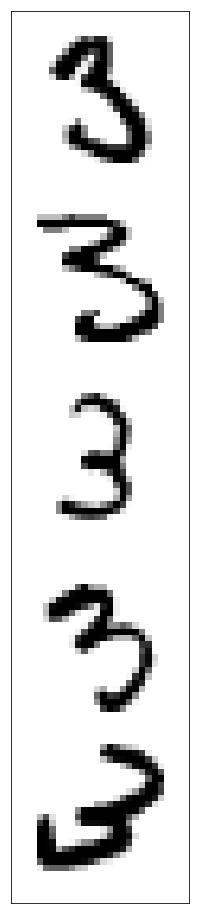

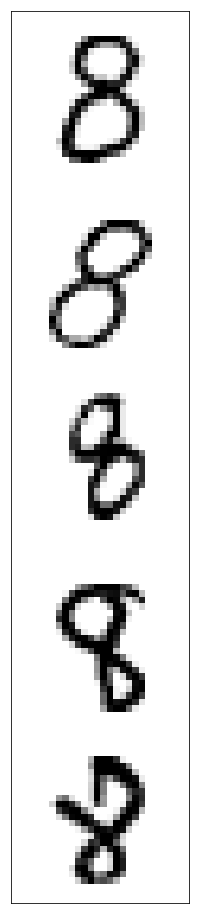

In [79]:
mnist_digit_show(clf3.support_vectors_[0:5,:])
mnist_digit_show(clf3.support_vectors_[88:93,:])
mnist_digit_show(clf3.support_vectors_[0:5,:], "mnistfig1.png")
mnist_digit_show(clf3.support_vectors_[88:93,:], "mnistfig2.png")

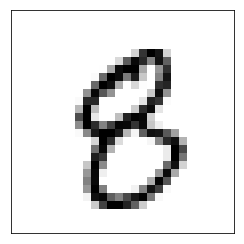

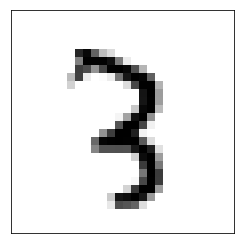

In [69]:
# Display in on screen  
mnist_digit_show(data.x_train[ 0,:])
mnist_digit_show(data.x_train[ 1,:])

In [ ]:
# Plot image to file 
mnist_digit_show(data.x_train[0,:], "mnistfig1.png")
mnist_digit_show(data.x_train[1,:], "mnistfig2.png")